<a href="https://colab.research.google.com/github/tingjhenjiang/python_ML_ntu_spring2019/blob/master/wk09_CNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras

## 使用CNN來做圖片辨識，把每個參數都調整，試試看哪樣的模型最好
使用mnist 資料庫

In [ ]:
%env KERAS_BACKEND=tensorflow
%matplotlib widget
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

env: KERAS_BACKEND=tensorflow


In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils, plot_model
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = tf.image.per_image_standardization(x_train)
#x_test = tf.image.per_image_standardization(x_test)
x_train = x_train.reshape(60000, 28, 28, 1) #最後面的維度通常是RGB顏色種類
x_test = x_test.reshape(10000, 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train = x_train/255 ## 資料正規化
x_test = x_test/255 ## 資料正規化

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, SpatialDropout2D
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.callbacks import History

## Convolution 5個filter, filtersize=6*6

In [ ]:
model = Sequential()
model.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1))) #convolution 通常越來越多 且需要整除
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2))) #max-pooling 通常 Max-pooling 越來越多
model.add(Conv2D(8, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#第一組完成
model.add(Conv2D(16, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#第二組完成
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#第四組完成
#以下需要接fully connected
#model.add(SpatialDropout2D(0.5))
model.add(Flatten())
model.add(Dense(60))
model.add(Activation('relu'))
model.add(Dense(60))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=0.087), metrics=['accuracy'])
model.summary()
plot_model(model, to_file='wk9_CNN_model.png', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 28, 28, 4)         104       
_________________________________________________________________
activation_103 (Activation)  (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 14, 14, 8)         808       
_________________________________________________________________
activation_104 (Activation)  (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 7, 7, 16)          3216      
__________

## 模型流程圖
<img src="https://github.com/tingjhenjiang/python_ML_ntu_spring2019/blob/master/wk9_CNN_model.png?raw=1">

## 訓練

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=10) 
#model.fit
#old 0.9682

Epoch 1/10
60000/60000 [==============================] - 17s 277us/step - loss: 1.0892 - acc: 0.6498
Epoch 2/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.2177 - acc: 0.9356
Epoch 3/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.1695 - acc: 0.9484
Epoch 4/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.1505 - acc: 0.9534
Epoch 5/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.1360 - acc: 0.9581
Epoch 6/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.1254 - acc: 0.9615
Epoch 7/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.1163 - acc: 0.9639
Epoch 8/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.1088 - acc: 0.9661
Epoch 9/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.1023 - acc: 0.9677
Epoch 10/10
60000/60000 [==============================] - 15s 248us/step - loss: 

## 訓練結果檢視

In [ ]:
score = model.evaluate(x_test, y_test)
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

10000/10000 [==============================] - 3s 296us/step
測試資料的 loss: 0.09313
測試資料的正確率: 0.9689


In [ ]:
predict = model.predict_classes(x_test)

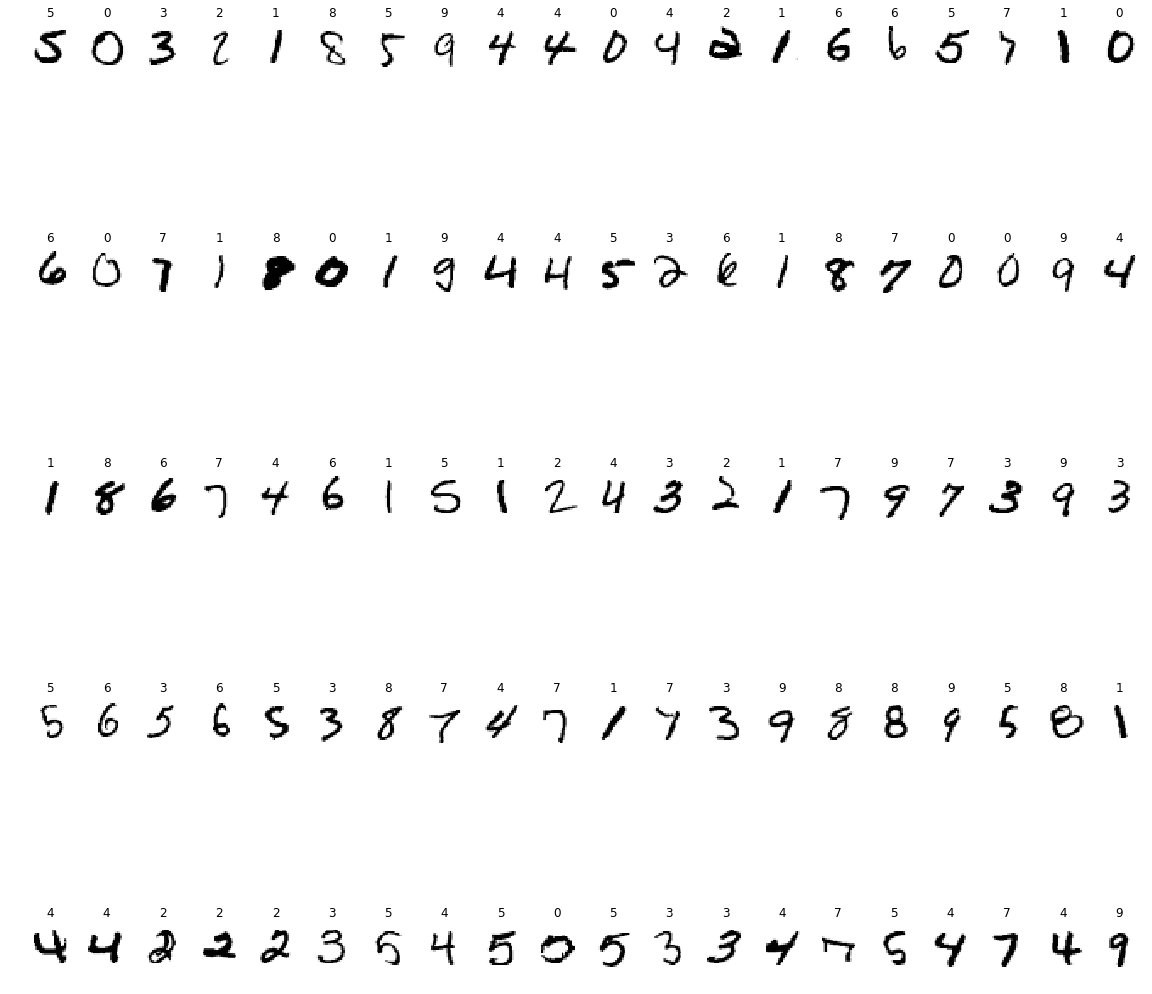

In [ ]:
showresultnum = 100
picks = np.random.randint(1,9999, showresultnum)
plt.figure(figsize=(20,20))
for picki in range(showresultnum):
    i = picks[picki]
    plt.subplot(5,showresultnum/5,picki+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys')
    plt.title(predict[i])
    plt.axis("off")

##  Keras in TF2.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

def std_nparray(arr):
    arr = (arr-arr.min())/(arr.max()-arr.min())
    return(arr)

def convert_for_softmax_output(arr):
    return(tf.keras.utils.to_categorical(arr, num_classes=len(np.unique(arr)), dtype='float32'))

In [51]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
originalshape = x_train.shape
print(originalshape) #(60000, 28, 28)
modelimgwidth, modelimgheight = x_train.shape[1:3]
modelinputshape_for_conv = list(x_train.shape[0:])
modelinputshape_for_conv.append(1)
modelinputshape_for_conv = tuple(modelinputshape_for_conv)
x_train = x_train.reshape(modelinputshape_for_conv)
x_train = std_nparray(x_train)
modelinputshape_for_conv_testdata = list(x_test.shape[0:])
modelinputshape_for_conv_testdata.append(1)
modelinputshape_for_conv_testdata = tuple(modelinputshape_for_conv_testdata)
x_test = x_test.reshape(modelinputshape_for_conv_testdata)
x_test = std_nparray(x_test)
y_train=convert_for_softmax_output(y_train)  #也可以不轉換，但下面要用sparse_categorical_crossentropy
y_test=convert_for_softmax_output(y_test)
x_val = x_train[-10000:]
y_val = y_train[-10000:]
print(x_train.shape)
print(x_train.dtype)
print(y_train)
print(y_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
float64
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)


In [61]:
modelinputshape_for_conv

(60000, 28, 28, 1)

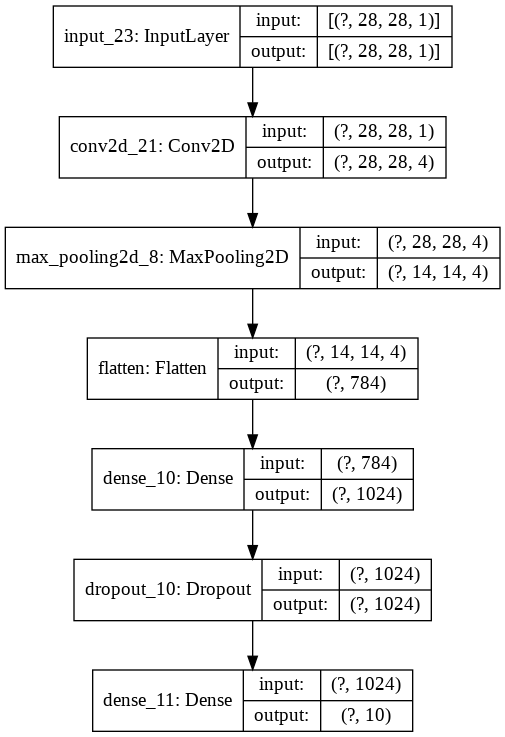

In [62]:
modelinputshape = x_train.shape[1:]
inputlayer = tf.keras.Input(shape=modelinputshape_for_conv[1:4])
conv1 = tf.keras.layers.Conv2D(4, 3, padding='same', activation="relu", use_bias=True,
                               kernel_initializer='glorot_uniform', bias_initializer='zeros'
)(inputlayer)
maxpool1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='same', data_format=None)(conv1)
flattenedlayer = tf.keras.layers.Flatten()(maxpool1)
fullyconnected_after_flatten = tf.keras.layers.Dense(1024, activation='relu')(flattenedlayer)
afterpool_dropout = tf.keras.layers.Dropout(.2)(fullyconnected_after_flatten)
outputlayer = tf.keras.layers.Dense(10, activation='softmax')(afterpool_dropout)
model = tf.keras.Model(inputs=inputlayer, outputs=outputlayer)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='CategoricalCrossentropy', #沒有to_categorical時可以用sparse_categorical_crossentropy
              metrics=['accuracy'],
              )
#model.summary()
tf.keras.utils.plot_model(
    model, show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [63]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0, validation_data=(x_val, y_val))

In [64]:
history.history

{'accuracy': [0.8929761648178101,
  0.9557142853736877,
  0.9667618870735168,
  0.9765714406967163,
  0.9802619218826294,
  0.9847618937492371,
  0.986547589302063,
  0.9874523878097534,
  0.9905952215194702,
  0.9897381067276001,
  0.9934285879135132,
  0.9939285516738892,
  0.9944999814033508,
  0.9961190223693848,
  0.9958094954490662,
  0.9966904520988464,
  0.996404767036438,
  0.9944285750389099,
  0.9974047541618347,
  0.9982380867004395,
  0.9979761838912964,
  0.9976666569709778,
  0.9976666569709778,
  0.9984762072563171,
  0.9984285831451416,
  0.9979047775268555,
  0.9992142915725708,
  0.9988571405410767,
  0.9990714192390442,
  0.9983333349227905,
  0.9982380867004395,
  0.998452365398407,
  0.9986904859542847,
  0.9987381100654602,
  0.9979047775268555,
  0.9986904859542847,
  0.9990476369857788,
  0.9987618923187256,
  0.9989761710166931,
  0.9989523887634277,
  0.9994285702705383,
  0.999666690826416,
  0.9991428852081299,
  0.9985714554786682,
  0.9989285469055176,
  

In [65]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
#no dropout test loss, test acc: [0.13936419785022736, 0.9725000262260437]

Evaluate on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9860
test loss, test acc: [0.09013057500123978, 0.9860000014305115]
Generate predictions for 3 samples
predictions shape: (3, 10)


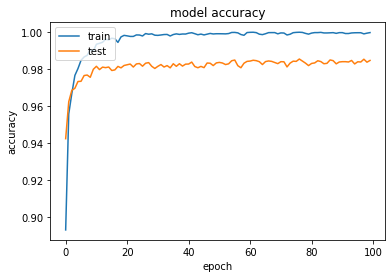

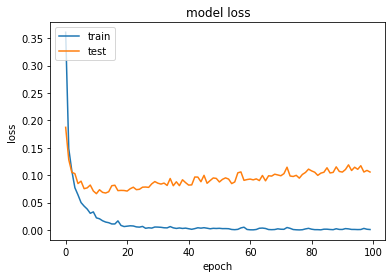

In [66]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()